# Exercise 4.1: Principal Component Analysis

In the current exercise, we will explore some properties, as well as limits, of Principal Component Analysis.

### Exploring data and plotting the Principal Components
__Task__: Given the two-dimensional zero-mean unlabeled dataset, compute and plot the principal components (PCs) together with the scatter plot of the data. Use the eigenvalue decomposition of the covariance matrix of the data to find the PC.

__Hint 1__: The directions of the PCs are given by the eigenvectors of the sample covariance matrix.

__Hint 2__: Scale length of the PCs using the square root of the eigenvalues of sample covariance matrix.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

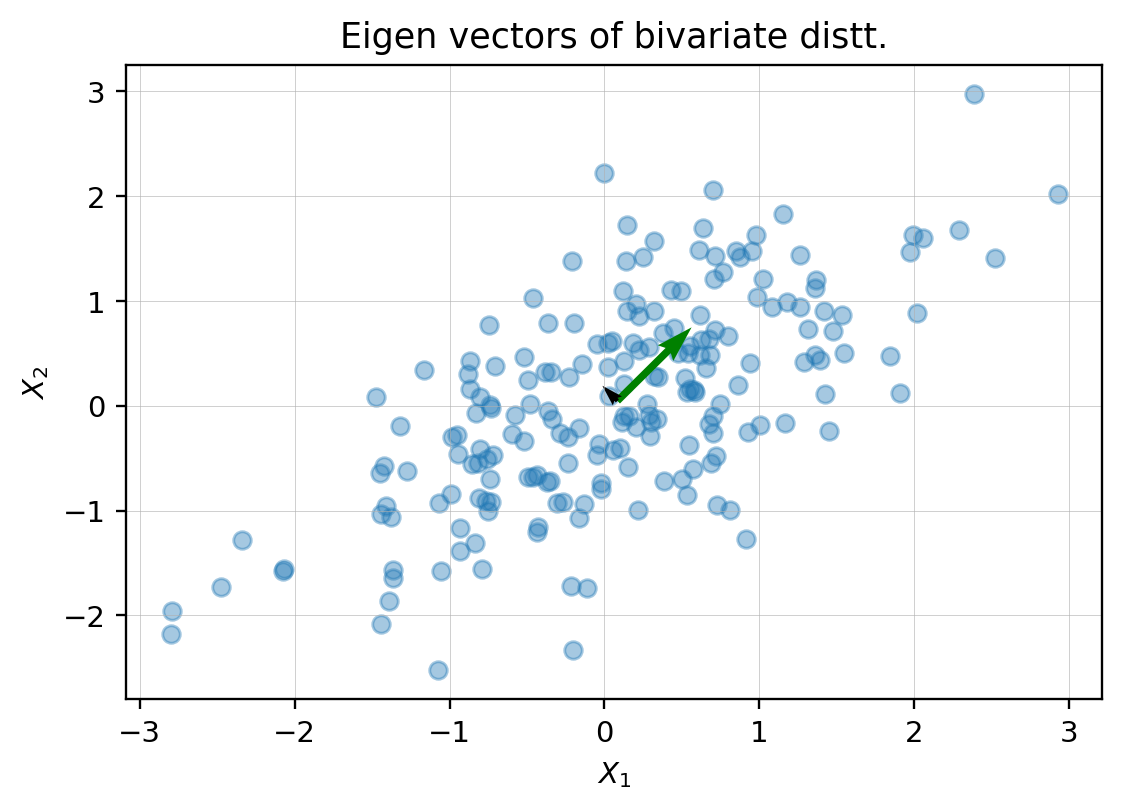

In [24]:
# Load data
X = np.loadtxt('data/PCA_1.data')
N_samples = X.shape[0]

def Hauke(X, tiit="Eigen vectors of bivariate distt."):
    # compute covariance matrix
    CovX = np.cov(X, rowvar=False)

    # compute eigenvalue decomposition and sort eigenvalues if necessary
    EvalCX, EvecCX = np.linalg.eig(CovX)
    # print(EvalCX)
    # print("\n\n",EvecCX)

    t = np.array([EvecCX[:,i]*EvalCX[i] for i in range(len(CovX))])
    # print("\n\n",t)


    # plot
    f = plt.figure(dpi=210)
    plt.scatter(X[:,0], X[:,1], marker="o", alpha=0.4)
    # plt.quiver(np.mean(X, axis=0)[0],np.mean(X, axis=0)[1], EvecCX[:,0], EvecCX[:,1], color=["r", "b"], scale=5 )
    plt.quiver(np.mean(X, axis=0)[0],np.mean(X, axis=0)[1], t[:,0], t[:,1], color=["g", "k"], scale=15 )
    plt.xlabel(r"$X_1$")
    plt.ylabel(r"$X_2$")
    plt.title(tiit)
    plt.grid(lw=0.2)

Hauke(X)

__Important note__ : Computational complexity of calculating the eigenvalue decomposition grows cubically with the number of features. Therefore, iterative approaches for computing the PCs are prefered when dealing with high dimensional data.


[Q to tutors]: what are itereative approaches for computing PCs?

### How outliers and scaling of the data affect PCA

The following dataset is similar to the one analyzed before, however it contains outliers. Explore the PCs again in the presence of outliers.

__Task:__ Compute and plot the PCs together with the scatter plot of the data.

__Q4.1.1 Why and how is PCA prone to fail in the presence of outliers?__

    [A]: The eigen vectors point in the direction of largest and smallest statistical variance (if we are working on 2D features), and since the covarience is calculated as 1/N *(sum (x1-mean(x1)(x2 - mean(x2)) ), and mean is affected by outliers, the Cov. matrix manifests the skewness introduced by the outliers --> eigen vectors are severely affected by this skewness. We assume variance is the most important thing, so we will select the component that varies the most from our cov. mat.
    

__Q4.1.2 How does the scaling of the features affect PCA? For example: Using centimeters instead of meters.__

    [A]: The measure of covariance is not normalised (cf. to correlation). Thus, it is affected by units strongly.

__Hint:__ PCA uses variance of the data as criterion to find the PCs.

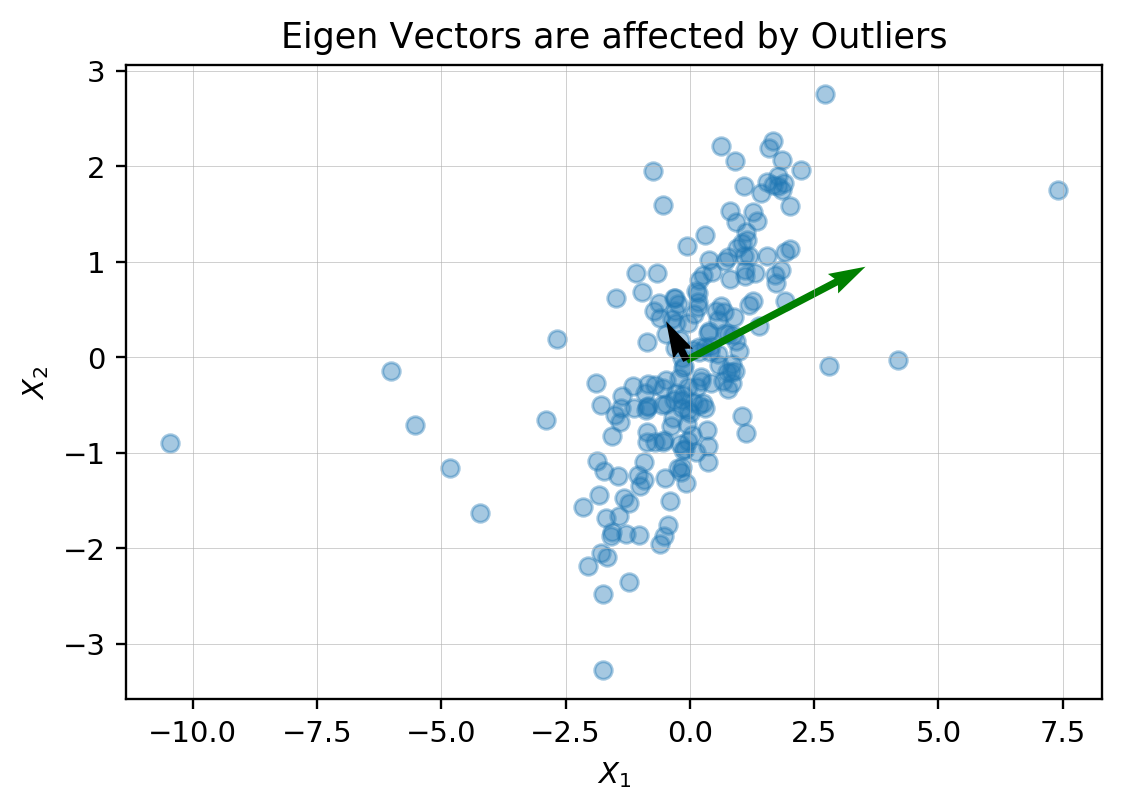

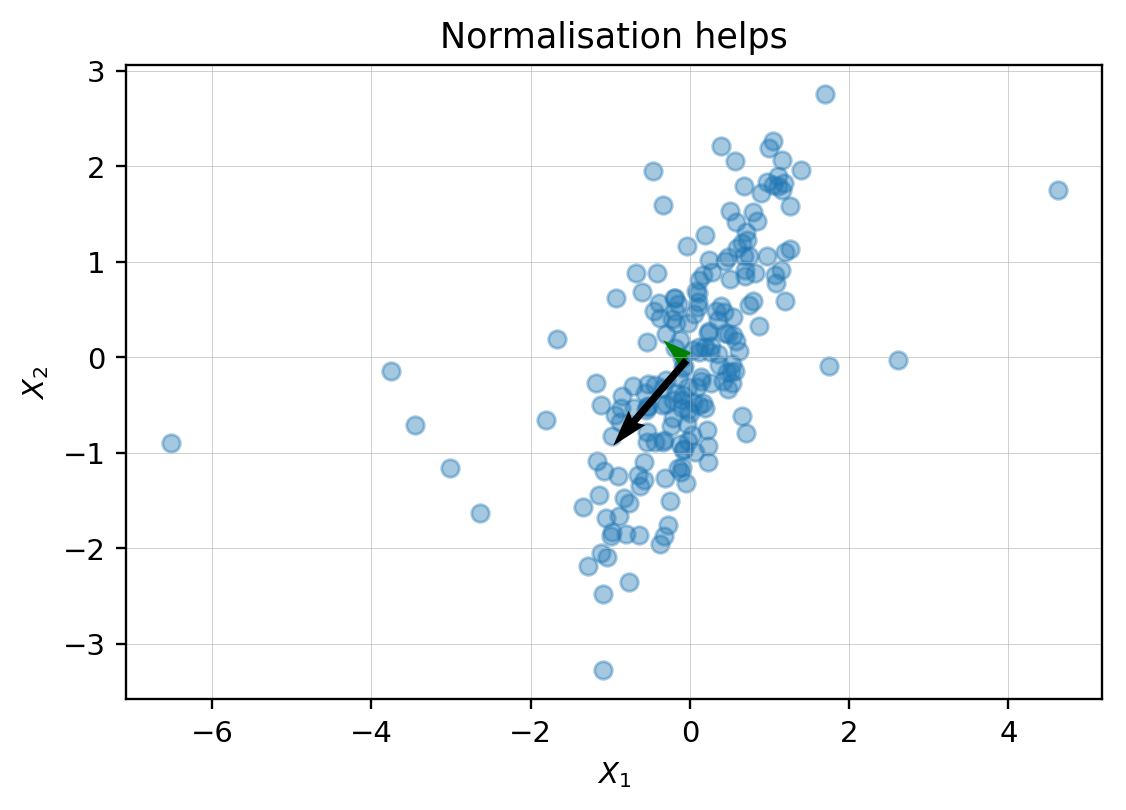

In [25]:
# load data
X = np.loadtxt('data/PCA_2.data')
N_samples = X.shape[0]

# X[:,0] = X[:,0]/np.std(X[:,0], 0)
# compute covariance matrix

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary

# plot
Hauke(X, "Eigen Vectors are affected by Outliers")

X[:,0] = X[:,0]/np.std(X[:,0], 0) # normalising by standard dev. to kinda normalise x1
Hauke(X, "Normalisation helps")

### Dimensionality reduction with PCA as preprocessing for classification problems

In the following exercise, we will see how PCA can be used to reduce the dimensionality of a dataset as a pre-processing stage for a classification task.

__Task 3__: For the first dataset, plot the PCs together with the scatter plot of the labelled data. Set the color of each of the points according to its class.

__Task 4__: Project the data onto each of the PCs and plot the projection. 

__Q4.1.3 Which of the PCs is more adequate to perform dimensionality reduction in the labelled dataset? Why?__ 

    [A]: The PC with the largest Eigen value is more adequate to perform dimensionality reduction, because projecting the data onto this eigen vector will help us capture the greatest variance in the data.

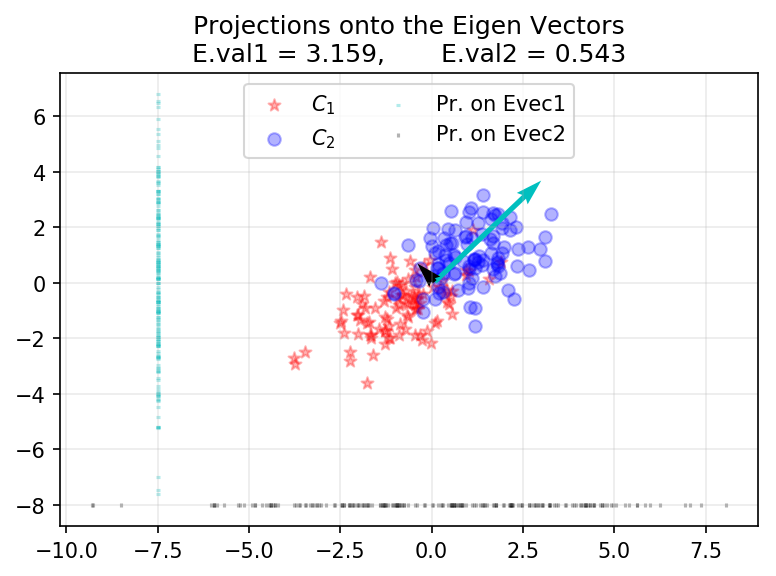

Variance of:
Projection onto Eigen Vec1 with E.val1 8.019
Projection onto Eigen Vec2 with E.val2 11.539


In [65]:
# load data
X = np.loadtxt('data/PCA_3.data')
y = np.loadtxt('data/PCA_3.labels')
N_samples = X.shape[0]

def Felix():
    # compute covariance matrix
    CovX = np.cov(X, rowvar=False)

    # compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
    EvalCX, EvecCX = np.linalg.eig(CovX)


    # compute eigenvalue decomposition and sort eigenvalues if necessary
    t = np.array([EvecCX[:,i]*EvalCX[i] for i in range(len(CovX))])


    # plot data projection (first eigenvector)

    # plot data projection (second eigenvector)
    f = plt.figure(dpi=150)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker="*", color="r", alpha=0.3, label=r"$C_1$")
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker="o", color="b", alpha=0.3, label=r"$C_2$")
    plt.quiver(np.mean(X, axis=0)[0],np.mean(X, axis=0)[1], t[:,0], t[:,1], color=["c", "k"], scale=15 )

    Xproj_ev1 = X@t[:,0] 
    Xproj_ev2 = X@t[:,1]


#     print("Variance of")
#     print("Proj onto ev1 with eval1 {:.3f}".format(np.std(Xproj_ev1,0)**2))
#     print("Proj onto ev2 with eval2 {:.3f}".format(np.std(Xproj_ev2,0)**2))

    plt.scatter([-7.5]*len(Xproj_ev1), Xproj_ev1, marker="_", color="c", alpha=0.3 , s=4, label="Pr. on Evec1")
    plt.scatter( Xproj_ev2, [-8]*len(Xproj_ev2), marker="|", color="k", alpha=0.3, s=4, label="Pr. on Evec2")



    plt.title("Projections onto the Eigen Vectors"+"\n"+"E.val1 = {:.3f},".format(EvalCX[0])+"       "+"E.val2 = {:.3f}".format( EvalCX[1]) )
    plt.grid(lw=0.2)
    plt.legend(loc=9, ncol=2)
    plt.show()
    return Xproj_ev1, Xproj_ev2

Xproj_ev1, Xproj_ev2 = Felix()    
print("Variance of:")
print("Projection onto Eigen Vec1 with E.val1 {:.3f}".format(np.std(Xproj_ev1,0)**2))
print("Projection onto Eigen Vec2 with E.val2 {:.3f}".format(np.std(Xproj_ev2,0)**2))

__Task 5__ Repeat tasks 3 and 4 for the following dataset.

__Q4.1.4 What is the most relevant PC in this case, given that the goal is to perform dimensionality reduction for a classification task?__

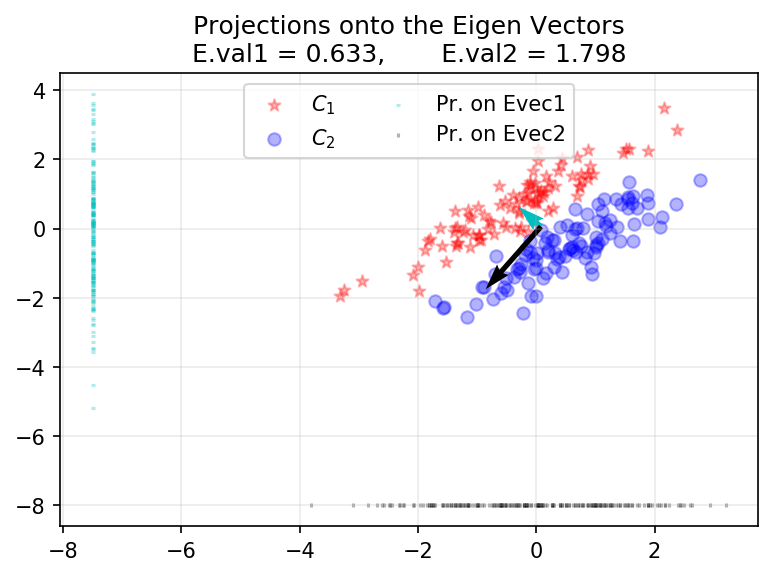

Variance of
Proj onto ev1 with eval1 2.721
Proj onto ev2 with eval2 1.877


In [66]:
# load data
X = np.loadtxt('data/PCA_4.data')
y = np.loadtxt('data/PCA_4.labels')
N_samples = X.shape[0]

# compute covariance matrix

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary

# plot original data

# plot data projection (first eigenvector)

# plot data projection (second eigenvector)
Xproj_ev1, Xproj_ev2 = Felix()
print("Variance of")
print("Proj onto ev1 with eval1 {:.3f}".format(np.std(Xproj_ev1,0)**2))
print("Proj onto ev2 with eval2 {:.3f}".format(np.std(Xproj_ev2,0)**2))



======== HELP! ========

Dear Tutor(s), 

Help us!
We printed out the variance of projected data onto the two eigen vectors, and it's not completely clear to us
if looking at this variance is a right indicator for the goodness of the principal component. 

Should we just be looking at the rank of the eigen values. 

Furthermore, is the variance of data projected onto eigen vector with the largest eigen value always
smaller than the projections onto eigen vectors of smaller ranks.

Pl. hlp :-(


======= thx ============

### PCA for dimensionality reduction: Selecting the number of PCs in a high dimensional dataset
In this section, we will explore the criteria that might be used to select the number of components for a dimensionality reduction task using PCA.

__Task 6__: Plot the eigenvalue spectrum of the following dataset. 

__Q4.1.5: By visually inspecting the eigenvalue spectrum of the covariance matrix, how many components do you think are necessary to achieve a good representation of the variance of the data?__

    [A]: 60 appears to be a good number. 

__Hint:__ The magnitude of the eigenvalues represents the contribution of the corresponding PCs to the variance of the data.

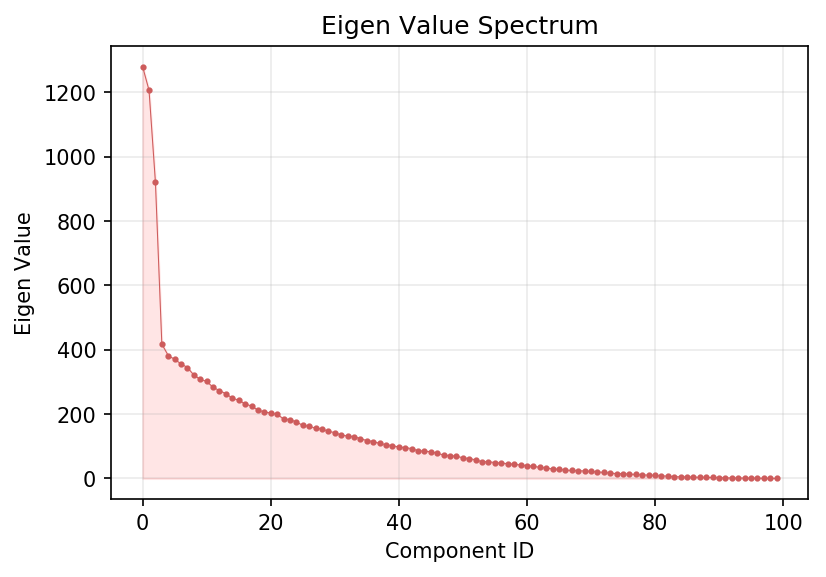

In [67]:
# load data
X = np.loadtxt('data/PCA_5.data')
N_samples = X.shape[0]

# compute covariance matrix
CovX = np.cov(X, rowvar=False)
#t = np.array([EvecCX[:,i]*EvalCX[i] for i in range(len(CovX))])

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
EvalCX, EvecCX = np.linalg.eig(CovX)
Eval_ord = np.sort(EvalCX)[::-1]

# plot eigenvalue spectrum
f = plt.figure(dpi=150)
plt.plot(Eval_ord, "-o", markersize="2", c="IndianRed", lw="0.5")
plt.fill_between(x = range(100) , y1=[0]*len(var_density), y2=Eval_ord, alpha=0.1, color="r")
plt.ylabel("Eigen Value")
plt.xlabel("Component ID")
plt.title("Eigen Value Spectrum")
plt.grid(lw=0.2)

Visually inspecting the eigenvalue spectrum of the covariance matrix do not always provide a clear criterion for the selection of the number of relevant components. If visualization does not deliver a clear cut-off point, an alternative criterion might be used: Typically, the number of PCs is selected so as to accumulate an __arbitrary__ amount of the variance, e.g. 90%, 95% or 99% of accumulated variance.

__Q4.1.6: Using the cumulative variance criterion, how many components should be selected for performing dimensionality reduction in the following dataset?__

    [A]: If we want to account for 95% of the variance, we should include the largest 58 (approx.) values in our model.

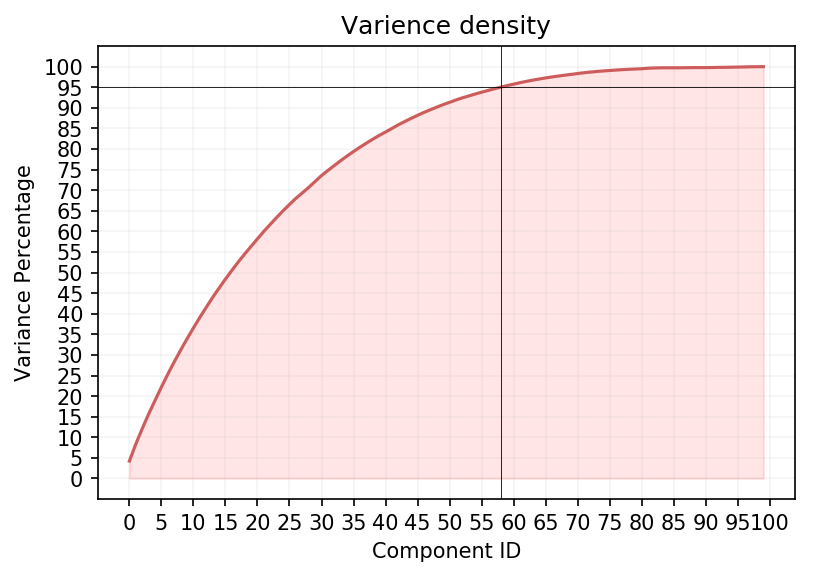

In [29]:
# load data
X = np.loadtxt('data/PCA_6.data')
N_samples = X.shape[0]

#compute covariance matrix
CovX = np.cov(X, rowvar=False)
EvalCX, EvecCX = np.linalg.eig(CovX)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
var_density = np.cumsum(EvalCX/np.sum(np.diag(CovX))) # formula adapted from scipy's source code

f = plt.figure(dpi=150)
plt.plot(var_density*100, c="IndianRed")
plt.fill_between(x = range(100) , y1=[0]*len(var_density), y2=var_density*100, alpha=0.1, color="r")
plt.axhline(95, color="k", lw=0.4)
plt.axvline(58, color="k", lw=0.4)
plt.xticks(range(0,101, 5)); plt.yticks(range(0, 101, 5))
plt.title("Varience density")
plt.xlabel("Component ID")
plt.ylabel("Variance Percentage")
plt.grid(lw=0.1)
plt.show()